In [56]:
import  numpy as np
import scipy.linalg as la

from sympy import * 
init_printing(use_unicode=True)

from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt

%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d

#add %matplotlib inline if using a Jupyter notebook, remove if using a .py script
%matplotlib inline

import scipy.optimize as sopt

### Input your Matrix here:

In [3]:
# A = [[1,2],
#      [3,4]]

A = [[5,9],
     [1,7],
     [-3,-5],
     [1,5]]


### Original Matrix A

In [4]:
M = np.array(A)

r, c = M.shape

M1 = Matrix(A) 

print("Original Matrix A:") 
M1

Original Matrix A:


⎡5   9 ⎤
⎢      ⎥
⎢1   7 ⎥
⎢      ⎥
⎢-3  -5⎥
⎢      ⎥
⎣1   5 ⎦

### Shape of Matrix A 

In [5]:
print("Matrix A with",r,"rows and",c,"columns.")

Matrix A with 4 rows and 2 columns.


### Transpose of Matrix A 

In [6]:
print("Transpose of A:\n",(M.T))

Transpose of A:
 [[ 5  1 -3  1]
 [ 9  7 -5  5]]


### Trace of Matrix A 

In [7]:
print("Trace of A:\n",np.trace(M))

Trace of A:
 12


### Rank of Matrix A 

In [10]:
print("Rank of A:\n",np.linalg.matrix_rank(M))

Rank of A:
 2


### Norm of Matrix A 

In [33]:
#length
print("Norm of A:\n",np.linalg.norm(M))

Norm of A:
 14.696938456699069


### Determinant and Inverse of Matrix A 

In [11]:
#for square / symmetric matrix only
if (r==c):
    print("\n** Determinant of M  **\n",la.det(M))
    print("\n** Inverse of M **\n",la.inv(M))


### Reduced Row Echelon Form (RREF)

In [12]:
# Use sympy.rref() method  
rref, p_tuple = M1.rref()       
print("The Row echelon form of matrix M:")
rref

The Row echelon form of matrix M:


⎡1  0⎤
⎢    ⎥
⎢0  1⎥
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

### Pivot Columns

In [13]:
print("Indices of the pivot columns:")
p_tuple

Indices of the pivot columns:


### Null space

In [14]:
print("Null Space of matrix:")
M1.nullspace()

Null Space of matrix:


### Left Null space

In [77]:
LNS_M = M1.T #left  null space is the nullspace of transpose of A
print("Left Null Space of matrix:")
LNS_M.nullspace()

Left Null Space of matrix:


⎡⎡8/13 ⎤  ⎡-1/13⎤⎤
⎢⎢     ⎥  ⎢     ⎥⎥
⎢⎢-1/13⎥  ⎢-8/13⎥⎥
⎢⎢     ⎥, ⎢     ⎥⎥
⎢⎢  1  ⎥  ⎢  0  ⎥⎥
⎢⎢     ⎥  ⎢     ⎥⎥
⎣⎣  0  ⎦  ⎣  1  ⎦⎦

### Column space

In [15]:
print("Column Space of matrix:")
M1.columnspace()

Column Space of matrix:


⎡⎡5 ⎤  ⎡9 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢7 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥⎥
⎢⎢-3⎥  ⎢-5⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣5 ⎦⎦

### Row space

In [16]:
print("Row Space of matrix:")
M1.rowspace()

Row Space of matrix:


[[5  9], [0  26]]

### Eigen Values

In [17]:
#for square matrix only
if (r==c):
    print("Eigen Values of matrix:")
    M1.eigenvals()

### Eigen Vectors

In [18]:
#for square matrix only
if (r==c):
    print("Eigen Vectors of matrix:")
    M1.eigenvects()

### Diagonalization

In [19]:
#for square matrix only
if (r==c):
    P, D = M1.diagonalize()


In [20]:
#for square matrix only
if (r==c):
    P

In [21]:
#for square matrix only
if (r==c):
    print("Diagonal D:")
    D

In [22]:
#for square matrix only
if (r==c):
    print("PD(P inverse):")
    P*D*P**-1

In [23]:
#for square matrix only
if (r==c):
    print("Check if M = PD(P-inverse):")
    P*D*P**-1 == M1

### Singular Values of A

In [46]:
#Compute singular values of matrix A
print("Singular values of matrix A (diagonal):\n\n", la.svdvals(M))

Singular values of matrix A:

 [14.48528137  2.48528137]


### Singular Value Decomposition (SVD)

In [24]:
#Singular Value Decomposition (SVD)
U, S, Vh = la.svd(M)

#(Unitary matrix (U) having left singular vectors as columns)
print("* Orthogonal Matrix of AA':\n\n",U)


#Vectors (S) with the singular values, sorted in descending order
print("\n\n* Diagonal Matrix:\n\n",S)

#Unitary matrix (Vh) having right singular vectors as rows
print("\n\n* Orthogonal Matrix of A'A:\n\n",Vh)

* Orthogonal Matrix of AA':

 [[-0.70611904  0.47288278  0.52185792 -0.07377049]
 [-0.47288278 -0.70611904 -0.07377049 -0.52185792]
 [ 0.39815919 -0.34532164  0.84972678 -0.0136612 ]
 [-0.34532164 -0.39815919  0.0136612   0.84972678]]


* Diagonal Matrix:

 [14.48528137  2.48528137]


* Orthogonal Matrix of A'A:

 [[-0.38268343 -0.92387953]
 [ 0.92387953 -0.38268343]]


In [25]:
# check if this svd is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
#print("\n\nChecking if it is the exact decomposition:\n\n",U @ np.diag(S) @ Vh)


### QR Factorization / Decomposition

In [26]:
def qr_factorization(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j - 1):
            q = Q[:, i]
            R[i, j] = q.dot(v)
            v = v - R[i, j] * q

        norm = np.linalg.norm(v)
        Q[:, j] = v / norm
        R[j, j] = norm
    return Q, R

In [27]:
#QR Decomposition

# Q, R = la.qr(M, mode='economic')
# print("** QR Decompisition **\n\n"
#       "Matrix (Q) with orthonormal columns:\n\n",Q)
# print("\n\nUpper-triangular matrix (R):\n\n",R)

Q, R = qr_factorization(M)

print("\n* Matrix  Q:\n\n",Q)
print("\n\n* Upper Triangular (R):\n\n",R)

print("\n\n* Shape of Q:",Q.shape, "\n\n* Shape of R:",R.shape)

print("\n* A = QR\n\n",np.matmul(Q,R))


* Matrix  Q:

 [[ 0.83333333  0.67082039]
 [ 0.16666667  0.52174919]
 [-0.5        -0.372678  ]
 [ 0.16666667  0.372678  ]]


* Upper Triangular (R):

 [[ 6.          0.        ]
 [ 0.         13.41640786]]


* Shape of Q: (4, 2) 

* Shape of R: (2, 2)

* A = QR

 [[ 5.  9.]
 [ 1.  7.]
 [-3. -5.]
 [ 1.  5.]]


### LU Decomposition

In [29]:
#LU Decomposition

P, L, U = la.lu(M)
print("\n * Permutation matrix (P):\n\n",P)
print("\n\n* Lower triangular matrix (L):\n\n",L)
print("\n\n* Upper triangular matrix (U):\n\n",U)


 * Permutation matrix (P):

 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


* Lower triangular matrix (L):

 [[ 1.          0.        ]
 [ 0.2         1.        ]
 [-0.6         0.07692308]
 [ 0.2         0.61538462]]


* Upper triangular matrix (U):

 [[5.  9. ]
 [0.  5.2]]


### Gram-Schmidt Orthogonization using Numpy 

In [34]:
def gs_cofficient(v1, v2):
    return np.dot(v2, v1) / np.dot(v1, v1)

def multiply(cofficient, v):
    return map((lambda x : x * cofficient), v)

def proj(v1, v2):
    return multiply(gs_cofficient(v1, v2) , v1)

def gs(X, row_vecs=True, norm = True):
    if not row_vecs:
        X = X.T
    Y = X[0:1,:].copy()
    for i in range(1, X.shape[0]):
        proj = np.diag((X[i,:].dot(Y.T)/np.linalg.norm(Y,axis=1)**2).flat).dot(Y)
        Y = np.vstack((Y, X[i,:] - proj.sum(0)))
    if norm:
        Y = np.diag(1/np.linalg.norm(Y,axis=1)).dot(Y)
    if row_vecs:
        return Y
    else:
        return Y.T

# def gs(vectors):
#     basis = []
#     for v in vectors:
#         w = v - np.sum( np.dot(v,b)*b  for b in basis )
#         if (w > 1e-10).any():  
#             basis.append(w/np.linalg.norm(w))
#     return np.array(basis)

# test = np.array([[1,3,5],
#                  [-1,3,1],
#                  [0,2,3],
#                  [1,-5,2],
#                  [1,5,8]])

# test2 = np.array([[1.0, 1.0, 0.0],
#                   [1.0, 3.0, 1.0],
#                   [2.0, -1.0, 1.0]])

print(np.array(gs(M)))
# print(np.array(gs(test2)))

[[ 0.6  0.8]
 [-0.8  0.6]]


### Unit Vector

In [55]:
u=[-30,40]

v=np.sqrt(u[0]**2+u[1]**2)

result=u/v

print("The unit vector:\n",result)

The unit vector:
 [-0.6  0.8]


### Check if two vectors are Orthogonal or not

In [30]:
u=[8,-5]
v=[-2,-3]

if np.dot(u,v)==0:
    print("Orthogonal")
else:
    print("Not Orthogonal")


Not Orthogonal


### Matrix Multiplication

In [31]:
M = np.array([[3,4, 5],[-1,5,5]])
print("Shape of M is", M.shape)

N = np.array([[5,6],[11,8], [5, 6]])
print("\nShape of N is", N.shape)

print("\n\nM * N:\n",M @ N)

Shape of M is (2, 3)

Shape of N is (3, 2)


M * N:
 [[84 80]
 [75 64]]


### Matrix Power

In [32]:
M = np.array([[3,4],[-1,5]])
print("Original matrix:\n",M)

pow = 2
print("\n\nM ^",pow,":")
mpow(M, pow)

Original matrix:
 [[ 3  4]
 [-1  5]]


M ^ 2 :


array([[ 5, 32],
       [-8, 21]])

### Gaussian Elimination for solving linear equations

In [33]:
# Solve the system of equations 
# 3 * x0 + 1 * x1 + 3 * x2 = 9 and 
# 1 * x0 + 2 * x1 + 5 * x2 = 8 and 
# 2 * x0 + 1 * x1 + 2 * x2 = 18:
    
a = np.array([[3,1,3],
              [1,2,5],
              [2,1,2]])

b = np.array([9,8,18])

x = np.linalg.solve(a, b)
x

array([  4.75,  36.  , -13.75])

### Least Squares solution to a linear matrix equation

In [70]:
#Computes the vector x that approximatively solves the equation A @ x = b
#y = m * x + c

#A
x = np.array([[1,1,0],
              [1,0,-1],
              [0,1,1],
              [-1,1,-1]]) 
#b
y = np.array([[2,5,6,6]]).T #Transpose to align dimensions


#stack_x = np.vstack([x, np.ones(len(x))]).T
least_m, residuals_c, rank_a, single_values = np.linalg.lstsq(x, y, rcond=None)

print("*Least Squares Solution:\n\n",least_m)
print("\n\n*Sum of residuals:\n\n",residuals_c)
print("\n\n*Rank of x:\n\n",rank_a)
print("\n\n*Singular values of x:\n\n",single_values)
print("\n\n*Least Square Error:\n\n",np.sqrt(residuals_c))


#plotting
# _ = plt.plot(x, y, 'o', label='Original data', markersize=10)
# _ = plt.plot(x, m*x + c, 'r', label='Fitted line')
# _ = plt.legend()
# plt.show()

*Least Squares Solution:

 [[ 0.33333333]
 [ 4.66666667]
 [-1.66666667]]


*Sum of residuals:

 [27.]


*Rank of x:

 3


*Singular values of x:

 [1.73205081 1.73205081 1.73205081]


*Least Square Error:

 [5.19615242]


### Expressing as linear combination (Orthogonal Projection)

In [ ]:
#two vectors

u1=[2,-3]
u2=[6,4]
x=[9,-7]
Origin = [0,0]
if np.dot(u1,u2)==0:
    c1 = (np.dot(x,u2)/np.dot(u1,u1))
    c2 = (np.dot(x,u2)/np.dot(u2,u2))
    p=np.array(u1)*c1+np.array(u2)*c2
    print("x=",p)
    
    print('Projection of x onto u: ',p)
    print('Orthogonal Complement of p: ',x-p)
else:
    print("Not Orthogonal")

x= [6. 1. 8.]
Projection of x onto u:  [6. 1. 8.]
Orthogonal Complement of p:  [8.8817842e-16 0.0000000e+00 0.0000000e+00]


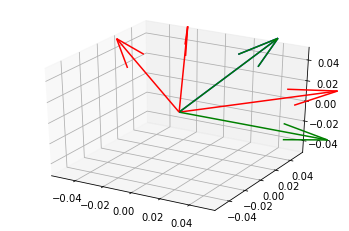

In [76]:
#three vectors

u1=[1,0,1]
u2=[-1,4,1]
u3=[2,1,-2]
x=[8,-4,-3]

origin = [0,0,0]


if (np.dot(u1,u2)==0) & (np.dot(u1,u3)==0) & (np.dot(u2,u3)==0):
    c1 = (np.dot(x,u1)/np.dot(u1,u1))
    c2 = (np.dot(x,u2)/np.dot(u2,u2))
    c3 = (np.dot(x,u3)/np.dot(u3,u3))
    p=np.array(u1)*c1+np.array(u2)*c2+np.array(u3)*c3
    print("x=",p)

    print('Projection of x onto u: ',p)
    print('Orthogonal Complement of p: ',x-p)

    fig=plt.figure()

    ax=fig.gca(projection='3d')

    ax.quiver(*origin, *u1, length=0.1,color=["red"], normalize=True)
    ax.quiver(*origin, *u2, length=0.1,color=["red"], normalize=True)
    ax.quiver(*origin, *u3, length=0.1,color=["red"], normalize=True)
    ax.quiver(*origin, *x, length=0.1,color=["blue"], normalize=True)

    ax.quiver(*origin, *p, length=0.1,color=["green"], normalize=True)

    ax.quiver(*origin, *(x-p), length=0.1,color=["green"], normalize=True)

    plt.show()

else:
    print("Not Orthogonal")

### Orthonormal Vectors (Basis)

In [ ]:
import numpy as np
import sympy as sym

v1=[3,0,-1]
v2=[8,5,-6]

u1=v1

e1=u1/np.sqrt(np.dot(u1,u1))

pv2=(np.dot(u1,v2)/np.dot(u1,u1))

u2=v2-np.dot(pv2,u1)

e2=u2/np.sqrt(np.dot(u2,u2))

print("Orthonormal basis:\n\n",e1,"\n\n",e2)

### Distance between 2 vectors

In [ ]:
u=[0,-5,2]
z=[-4,-1,8]

d=np.sqrt(((u[0]-z[0])**2)+((u[1]-z[1])**2)+((u[2]-z[2])**2))

print("Distance between 2 vectors: ",d)

### Projection 

In [ ]:
def proj(v,w):
    '''Project vector v onto w.'''
    v = np.array(v)
    w = np.array(w)
    return np.sum(v * w)/np.sum(w * w) * w

In [ ]:
proj([1,2,3],[1,1,1])

### Dot product of 2 vectors

In [25]:
a = np.array([1+2j,3+4j])
b = np.array([5+6j,7+8j])


print("  a.b:\n\n",np.vdot(a, b))

print("\n\n  b.a:\n\n",np.vdot(b, a))


  a.b:

 (70-8j)


  b.a:

 (70+8j)


### Inner and outer products of 2 arrays

In [31]:
a = np.array([1,2,3])
b = np.array([0,1,0])

print("Inner product of a, b:\n",np.inner(a, b))

print("\n\nOuter product of a, b:\n\n",np.outer(a, b))

Inner product of a, b:
 2


Outer product of a, b:

 [[0 1 0]
 [0 2 0]
 [0 3 0]]


### Derivative

In [64]:
# import sympy
from sympy import *

x, y = symbols('x y')

#change your expression here
expr = 5*(x)**2+y**2

print("* Expression: {} ".format(expr))
# Use sympy.Derivative() method
expr_diff_x = Derivative(expr, x)
expr_diff_y = Derivative(expr, y)
print("\n\n* {}".format(expr_diff_x),":\n\n{}".format(expr_diff_x.doit())) #with respect to x
print("\n\n* {}".format(expr_diff_y),":\n\n{}".format(expr_diff_y.doit())) #with respect to y


* Expression: 5*x**2 + y**2 


* Derivative(5*x**2 + y**2, x) :

10*x


* Derivative(5*x**2 + y**2, y) :

2*y
